<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-2-Statistics/blob/master/daniel_benson_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Imports
from scipy.stats import ttest_ind, ttest_1samp, t
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Create url and column names
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
house_columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
           'el-salvador-aid', 'religious-groups-in-schools', 
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
           'immigration', 'synfuels-corporation-cutback', 'education-spending',
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 
           'export-administration-act-south-africa']

In [9]:
# Read in the data
df = pd.read_csv(url, header=None, names=house_columns, na_values='?')
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [12]:
# Turn objects into usable numbers
df = df.replace({'y':1, 'n':0})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Create our confidence interval 
def confidence_interval(data, confidence=0.95):
  """
  Calculate confidence interval using a sample mean from specified data.
  Uses t-distribution and 2-tailed test with a default confidence of 0.95

  Arguments: 
  data - iterable (list or numpy array) of sample observations
  confidence - confidence level for the interval

  Return:
  tuple (mean, lower-bound, upper-bound)
  """
  data = np.array(data) # Sets data into numpy array
  mean = np.nanmean(data) # Creates a mean of the data, ignoring nan values
  n = len(data) # Sets n to the length of the data
  stderr = np.nanstd(data, ddof=1)/np.sqrt(n) # Creates our standard deviation error ignoring nan values
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1) # Looks up corresponding t-stat
  return (mean, mean-moe, mean+moe)

In [13]:
# Let's use this on some data! First check our shape.
df.shape

(435, 17)

In [16]:
# Seperate into two seperate groups: Republican and Democrat
republican = df[df['Class Name']=='republican']
democrat = df[df['Class Name']=='democrat']
print(republican.shape)
print(democrat.shape)

(168, 17)
(267, 17)


In [19]:
# Test out the cofidence interval on republican support for handicapped-infants column first
rep_handi_inf = republican['handicapped-infants']
confidence_interval(rep_handi_inf) # (returns: mean, lower-bound, upper-bound)

(0.18787878787878787, 0.12819979769991746, 0.24755777805765827)

In [0]:
# The above return means that the mean republican support of the handicapped-infants
# bill is 18.7%, with a 95% confidence that the support will fall between 
# the lower-bound 12.8% and the upper-bound 24.7%

In [46]:
rep_handi_inf.value_counts()

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64

In [0]:
# Create functions to deal with nan values
def rep_column(column):
  rep_col = republican[column]
  rep_no_nans = rep_col[~np.isnan(rep_col)]
  return rep_no_nans

In [0]:
def dem_column(columns):
  dem_col = democrat[column]
  dem_no_nans = dem_col[~np.isnan(dem_col)]
  return dem_no_nans

In [80]:
rep_handi_no_nans = rep_column('handicapped-infants')
rep_handi_no_nans.value_counts()

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64

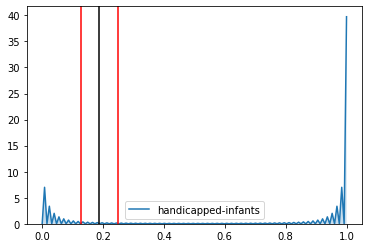

In [79]:
# Let's explore this graphically using kernel density estimate (kde)
sns.kdeplot(rep_handi_no_nans, shade=True)
CI = confidence_interval(rep_handi_inf)
# Add vline to display lower-bound
plt.axvline(x=CI[1], color='red')
# Add vline to display upper-bound
plt.axvline(x=CI[2], color='red')
# Add vline to display mean
plt.axvline(x=CI[0], color='black');

## Chi-Square

In [0]:
# Let's try the titanic dataset


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)